In [1]:
import deepxde as dde
import numpy as np
from deepxde.backend import pytorch
import torch
import matplotlib.pyplot as plt
from SIRD_deepxde_class import SIRD_deepxde_net
from SIRD_deepxde_class import Plot

seed = 0
np.random.seed(seed)
dde.config.set_random_seed(seed)

Using backend: pytorch



In [2]:
alpha_real = 0.2
beta_real = 0.05
gamma_real = 0.01

In [6]:
iterations = 40000
init_model_settings = {'activation':'tanh',
                        'layer_size':[1] + [32] * 3 + [4],
                        'print_every':100,
                        'lr':0.01,
                        'initializer':"Glorot uniform"}

total  [2.22851736e+05 1.47701922e+03 4.30991342e+06 7.66509001e+05]
total  5300751.17424042


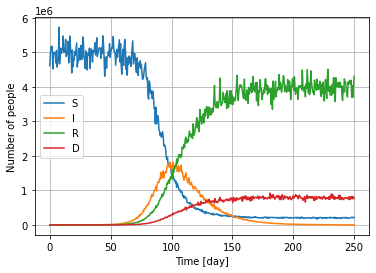

In [7]:
import ODE_SIR
solver = ODE_SIR.ODESolver()
t_synth, wsol_synth, N = solver.solve_SIRD(alpha_real, beta_real, gamma_real)
wsol_synth = solver.add_noise(wsol_synth, scale_pct=0.05)
solver.plot_SIRD(t_synth, wsol_synth)

In [8]:
max_timestep = 100
t_bool = t_synth < max_timestep
t = t_synth[t_bool]
wsol = wsol_synth[t_bool]
model = SIRD_deepxde_net(t, wsol, init_num_people=solver.init_num_people, model_name='pp100')
model.init_model(**init_model_settings)
model.train_model(iterations=iterations, print_every=init_model_settings['print_every'])
alpha_nn, beta_nn, gamma_nn = model.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model.set_synthetic_data(t_synth, wsol_synth)
model.set_nn_synthetic_data(t_nn_param, wsol_nn_param)
alpha_nn, beta_nn, gamma_nn = model.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model.set_synthetic_data(t_synth, wsol_synth)
model.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000190 s

Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
0         [1.16e-04, 3.90e-03, 9.49e-04, 4.62e-03, 9.27e-01, 4.02e-02, 8.57e-02, 1.00e+00]    [1.16e-04, 3.90e-03, 9.49e-04, 4.62e-03, 9.27e-01, 4.02e-02, 8.57e-02, 1.00e+00]    []  
100       [2.60e-05, 2.44e-05, 2.27e-05, 2.35e-05, 1.42e-02, 2.74e-03, 2.49e-03, 4.69e-04]    [2.60e-05, 2.44e-05, 2.27e-05, 2.35e-05, 1.42e-02, 2.74e-03, 2.49e-03, 4.69e-04]    []  
200       [2.22e-05, 1.84e-05, 5.56e-06, 1.01e-05, 1.29e-02, 2.99e-03, 1.67e-03, 2.97e-04]    [2.22e-05, 1.84e-05, 5.56e-06, 1.01e-05, 1.29e-02, 2.99e-03, 1.67e-03, 2.97e-04]    []  
300       [3.92e-05, 2.47e-05, 3.63e-06, 4.64e-06, 8.61e-03, 1.59e-03, 1.25e-03, 4.14e-05]    [3.92e-05, 2.47e-05, 3.63e-06, 4.64e-06, 8.61e-03, 1.59e-03, 1.25e-03, 4.14e-05]    []  
400       [4.

In [9]:
max_timestep = 85
t_bool = t_synth < max_timestep
t = t_synth[t_bool]
wsol = wsol_synth[t_bool]
model85 = SIRD_deepxde_net(t, wsol, init_num_people=solver.init_num_people, model_name='pp85')
model85.init_model(**init_model_settings)
model85.train_model(iterations=50000, print_every=init_model_settings['print_every'])
alpha_nn, beta_nn, gamma_nn = model85.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model85.set_synthetic_data(t_synth, wsol_synth)
model85.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000181 s

Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
0         [1.85e-02, 9.01e-04, 9.14e-03, 1.03e-03, 1.49e+00, 3.31e-03, 1.21e+00, 2.00e-01]    [1.85e-02, 9.01e-04, 9.14e-03, 1.03e-03, 1.49e+00, 3.31e-03, 1.21e+00, 2.00e-01]    []  
100       [2.95e-05, 1.13e-06, 2.94e-06, 2.35e-06, 3.97e-03, 8.12e-04, 1.81e-04, 2.52e-05]    [2.95e-05, 1.13e-06, 2.94e-06, 2.35e-06, 3.97e-03, 8.12e-04, 1.81e-04, 2.52e-05]    []  
200       [7.37e-06, 1.28e-06, 2.43e-06, 7.17e-07, 3.64e-03, 5.81e-04, 1.03e-04, 1.59e-05]    [7.37e-06, 1.28e-06, 2.43e-06, 7.17e-07, 3.64e-03, 5.81e-04, 1.03e-04, 1.59e-05]    []  
300       [7.27e-06, 1.64e-06, 2.28e-06, 7.71e-07, 3.41e-03, 5.39e-04, 8.25e-05, 1.64e-05]    [7.27e-06, 1.64e-06, 2.28e-06, 7.71e-07, 3.41e-03, 5.39e-04, 8.25e-05, 1.64e-05]    []  
400       [4.

In [10]:
max_timestep = 75
t_bool = t_synth < max_timestep
t = t_synth[t_bool]
wsol = wsol_synth[t_bool]
model75 = SIRD_deepxde_net(t, wsol, init_num_people=solver.init_num_people, model_name='pp75')
model75.init_model(**init_model_settings)

Compiling model...
'compile' took 0.000151 s



In [11]:
model75.train_model(iterations=50000, print_every=init_model_settings['print_every'])
alpha_nn, beta_nn, gamma_nn = model75.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model75.set_synthetic_data(t_synth, wsol_synth)
model75.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
0         [1.77e-03, 3.85e-02, 1.04e-02, 1.38e-02, 1.78e+00, 6.39e-01, 7.21e-01, 1.02e+00]    [1.77e-03, 3.85e-02, 1.04e-02, 1.38e-02, 1.78e+00, 6.39e-01, 7.21e-01, 1.02e+00]    []  
100       [2.09e-05, 1.79e-05, 3.19e-05, 8.01e-06, 2.69e-03, 8.99e-05, 4.55e-05, 1.29e-05]    [2.09e-05, 1.79e-05, 3.19e-05, 8.01e-06, 2.69e-03, 8.99e-05, 4.55e-05, 1.29e-05]    []  
200       [8.84e-06, 2.27e-06, 5.60e-06, 3.61e-06, 2.65e-03, 7.06e-05, 1.87e-05, 7.70e-06]    [8.84e-06, 2.27e-06, 5.60e-06, 3.61e-06, 2.65e-03, 7.06e-05, 1.87e-05, 7.70e-06]    []  
300       [5.79e-06, 1.86e-06, 2.56e-06, 2.86e-06, 2.64e-03, 5.45e-05, 9.98e-06, 4.79e-06]    [5.79e-06, 1.86e-06, 2.56e-06, 2.86e-06, 2.64e-03, 5.45e-05, 9.98e-06, 4.79e-06]    []  
400       [3.45e-06, 1.42e-06, 5.76e-07, 1.79e-06, 2.64e-03

# plot

In [12]:
values_to_plot = ['I']
plot_model = Plot(model, values_to_plot=values_to_plot)
plot_model85 = Plot(model85, values_to_plot=values_to_plot)
plot_model75 = Plot(model75, values_to_plot=values_to_plot)

t_real, wsol_real, N = solver.solve_SIRD(alpha_real, beta_real, gamma_real)

In [37]:
colors = plt.cm.Oranges(np.linspace(0.3,1,4))
colors

array([[0.99215686, 0.76444444, 0.55240292, 1.        ],
       [0.97960784, 0.51529412, 0.1924183 , 1.        ],
       [0.82117647, 0.27183391, 0.00509035, 1.        ],
       [0.49803922, 0.15294118, 0.01568627, 1.        ]])

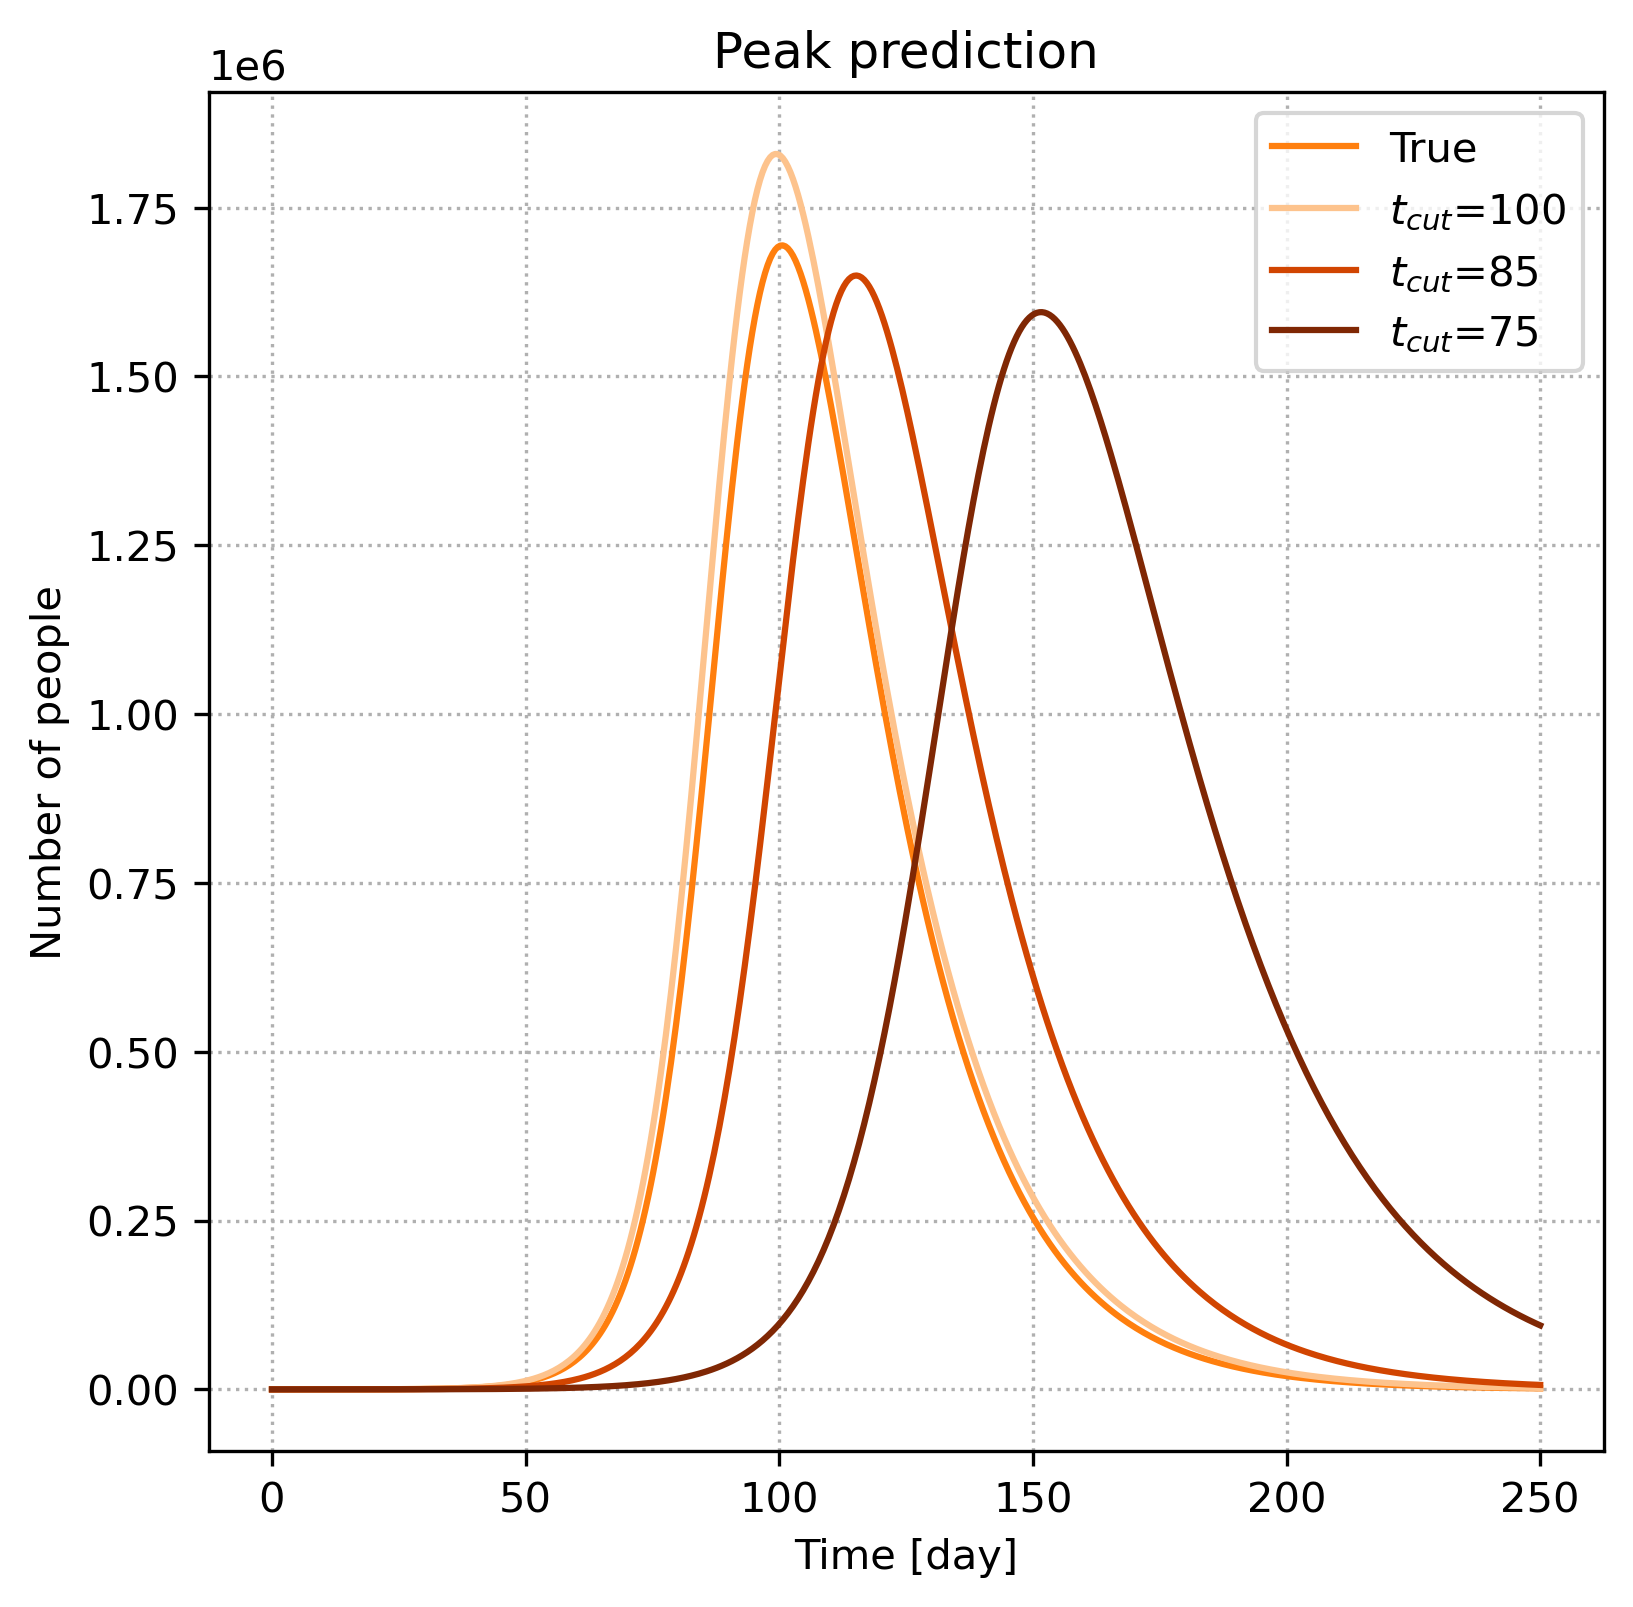

In [38]:
fig, ax = plt.subplots(dpi=300, figsize=(6,6))
max_val = max(plot_model.model.wsol_synth[:,1].max(), plot_model.model.wsol_nn_synth[:,1].max(), 
             plot_model85.model.wsol_nn_synth[:,1].max(), plot_model75.model.wsol_nn_synth[:,1].max())


line = ax.plot(t_real, wsol_real[:,1], color='C1', label='True')

line = ax.plot(plot_model.model.t_synth, plot_model.model.wsol_nn_synth[:,1], color=colors[0], label='$t_{cut}$=100')
#ax.vlines(x=100, ymin=0,ymax=max_val, color=plot_model.colors[1], linestyle='--', linewidth=0.5)

line = ax.plot(plot_model85.model.t_synth, plot_model85.model.wsol_nn_synth[:,1], color=colors[2], label='$t_{cut}$=85')
#ax.vlines(x=85, ymin=0,ymax=max_val, color=plot_model.colors[2], linestyle='--', linewidth=0.5)

line = ax.plot(plot_model75.model.t_synth, plot_model75.model.wsol_nn_synth[:,1], color=colors[3], label='$t_{cut}$=75')
#ax.vlines(x=75, ymin=0,ymax=max_val, color=plot_model.colors[3], linestyle='--', linewidth=0.5)

ax.grid(linestyle=':') #
ax.set_axisbelow(True)

ax.legend() #title='t_{cut}'
ax.set_title('Peak prediction')
ax.set_xlabel('Time [day]')
ax.set_ylabel('Number of people')
plt.savefig('Peak prediction',bbox_inches='tight')